# Data Mining : proposition de projet

## Choix de la base de données

Pour notre projet de Data mining, nous avons choisi d'utiliser la base "Online Popularity News", disponible en libre accès [ici](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). La base de données contient un ensemble d'informations relatives aux articles publiés sur le site [Mashable](https://fr.wikipedia.org/wiki/Mashable) entre janvier 2013 et janvier 2015. 

La base contient 39644 observations et 61 colonnes.

In [1]:
import pandas as pd
df = pd.read_csv('OnlineNewsPopularity.csv')
print(df.shape)
df.head(5)

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [56]:
print(df.isnull().sum()[40:].to_latex())

\begin{tabular}{lr}
\toprule
{} &  0 \\
\midrule
 LDA\_01                       &  0 \\
 LDA\_02                       &  0 \\
 LDA\_03                       &  0 \\
 LDA\_04                       &  0 \\
 global\_subjectivity          &  0 \\
 global\_sentiment\_polarity    &  0 \\
 global\_rate\_positive\_words   &  0 \\
 global\_rate\_negative\_words   &  0 \\
 rate\_positive\_words          &  0 \\
 rate\_negative\_words          &  0 \\
 avg\_positive\_polarity        &  0 \\
 min\_positive\_polarity        &  0 \\
 max\_positive\_polarity        &  0 \\
 avg\_negative\_polarity        &  0 \\
 min\_negative\_polarity        &  0 \\
 max\_negative\_polarity        &  0 \\
 title\_subjectivity           &  0 \\
 title\_sentiment\_polarity     &  0 \\
 abs\_title\_subjectivity       &  0 \\
 abs\_title\_sentiment\_polarity &  0 \\
 shares                       &  0 \\
\bottomrule
\end{tabular}



In [35]:
print(df.iloc[:,-7:].describe().to_latex(float_format="%3g"))

\begin{tabular}{lrrrrrrr}
\toprule
{} &   min\_negative\_polarity &   max\_negative\_polarity &   title\_subjectivity &   title\_sentiment\_polarity &   abs\_title\_subjectivity &   abs\_title\_sentiment\_polarity &   shares \\
\midrule
count &                   39644 &                   39644 &                39644 &                      39644 &                    39644 &                          39644 &    39644 \\
mean  &               -0.521944 &                 -0.1075 &             0.282353 &                  0.0714254 &                 0.341843 &                       0.156064 &  3395.38 \\
std   &                 0.29029 &                0.095373 &             0.324247 &                    0.26545 &                 0.188791 &                       0.226294 &    11627 \\
min   &                      -1 &                      -1 &                    0 &                         -1 &                        0 &                              0 &        1 \\
25\%   &                   

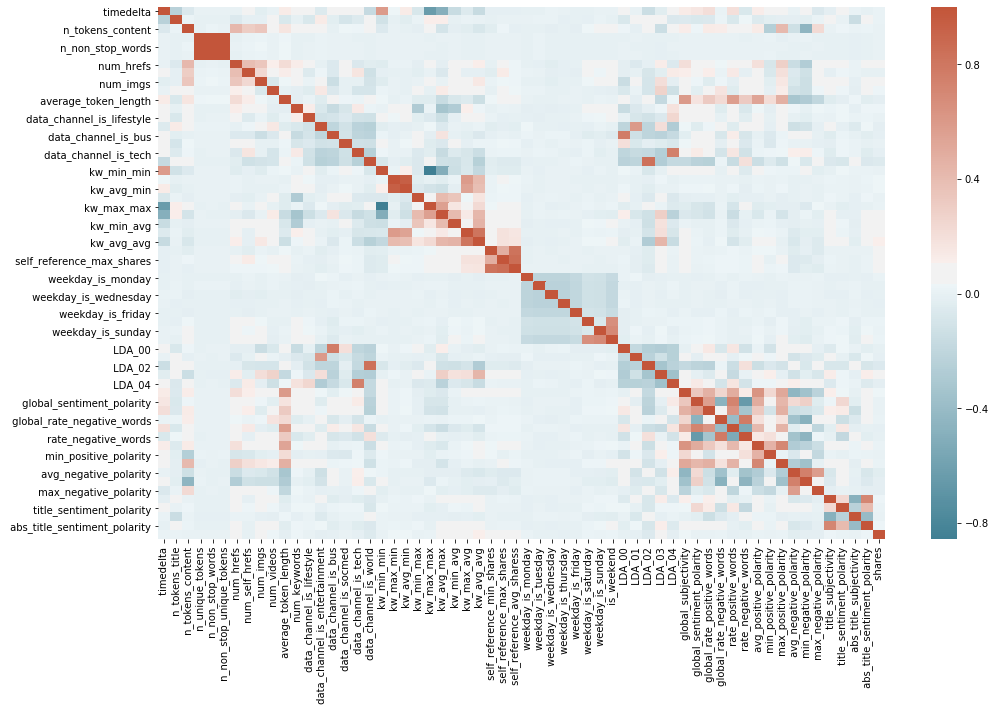

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()


plt.figure(figsize=(15,10))
sns.heatmap(corr, 
            annot=False,
            cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.tight_layout(True)
plt.savefig('corr.png')

## Audit de la base de données

### Variable cible et variables explicatives

Notre base de données a été construite dans le cadre de travaux cherchant à prédire la popularité d'un article à partir de ses caractéristiques. Les différentes variables contenues dans notre base ont été construites en utilisant des méthodes d'analyse naturelle du langage. Il est donc important de nous assurer de la bonne compréhension de chacune des variables avant de réaliser un audit plus poussé. La liste des variables et leur signification est donnée ci-dessous :
0. url: URL of the article
1. timedelta: Days between the article publication and the dataset acquisition 
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares

La variable 60 correspond au nombre de partages sur les réseaux sociaux (Facebook, Twitter, Google+, LinkedIn, Stumble-Upon et Pinterest), c'est la variable que nous essaierons de prédire (nous la noterons parfois $Y$ dans ce qui suit). Les variable 0 et 1 correspondent respectivement à l'URL de l'article, et au nombre de jours écoulés entre la publication de l'article et la création de la base de données. Ces deux variables ne sont pas supposées nous apporter de l'information utile à la prédiction de $Y$ ; par conséquent, elles devront être retirées de la base avant de passer à l'analyse prédictive.

Les autres variables ont été construites en utilisant des méthodes d'analyse naturelle du langage. Afin de s'assurer de leur bonne compréhension, un certain nombre de remarques préalables doivent être faites. D'abord, les *stop words* correspondent à ce que l'on appelle des mots vides, c'est-à-dire des mots tellement communs que leur prise en compte n'est pas requise (les mots "la", "de", "un" *etc*. en sont des exemples). Aussi, les créateurs de la base ont distingués sept catégories auxquelles les articles peuvent appartenir, ces catégories sont désignées par le mot *channel* (*business*, *tech*, *lifestyle etc*.) et sont représentées par les variables commençant par `data_channel_`. Notons également qu'un algorithme LDA (Latent Dirichlet Allocation) a été utilisé sur l'ensemble des articles afin de mettre en évidence cinq sujets récurrents et mesurer la proximité des chaque article à ces cinq thèmes. Les variables correspondantes commencent par `LDA_`. Enfin, la polarité fait référence au degré de négativité ou de positivité d'un énoncé, tandis que la subjectivité fait référence au degré de jugement, d'émotion ou d'implication personnelle de l'auteur. Ces notions sont capturées par les variables se terminant par `_polarity` et `_subjectivity`. La description donnée par les auteurs pour les autres variables est claire.

### Valeur manquantes et aberrantes

Dans ce qui suit, nous utilisons la librarie `pandas_profiling` afin de générer une analyse descriptive simple (quasi-)complète de notre jeu de données.

Notre base de données ne contient pas de valeurs manquantes. 

Pour ce qui est des valeurs aberrantes ... **FAIRE DES PLOTS VITE FAIT** ? Aussi, nous remarquons que toutes les variables relatives à la polarité sont bien comprises en -1 et 1 tandis que celles relaties à la subjectivité sont comprises en 0 et 1. Il en est de même pour les variables correspondant à des ratios.

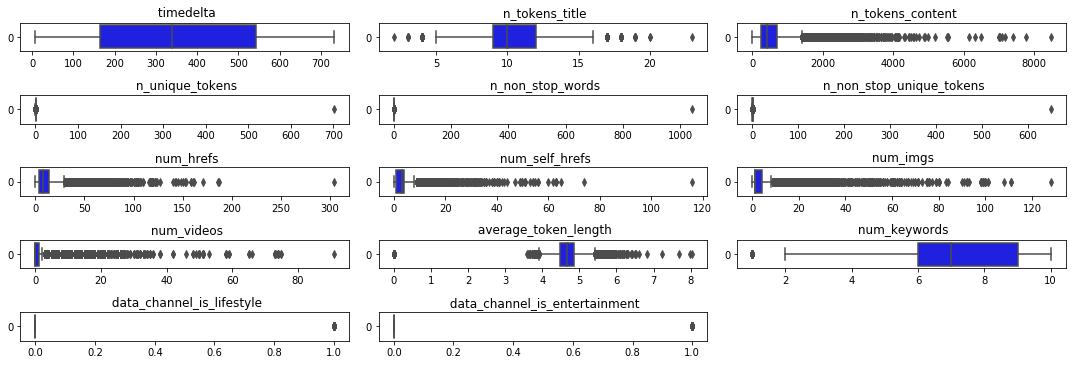

In [52]:
plt.figure(figsize=(15,15))
for i,j in enumerate(df.columns[1:15]) :
    plt.subplot(15,3,i+1)
    sns.boxplot(data=df.loc[:,j], orient='h', color='blue')
    plt.title(j);
plt.tight_layout()

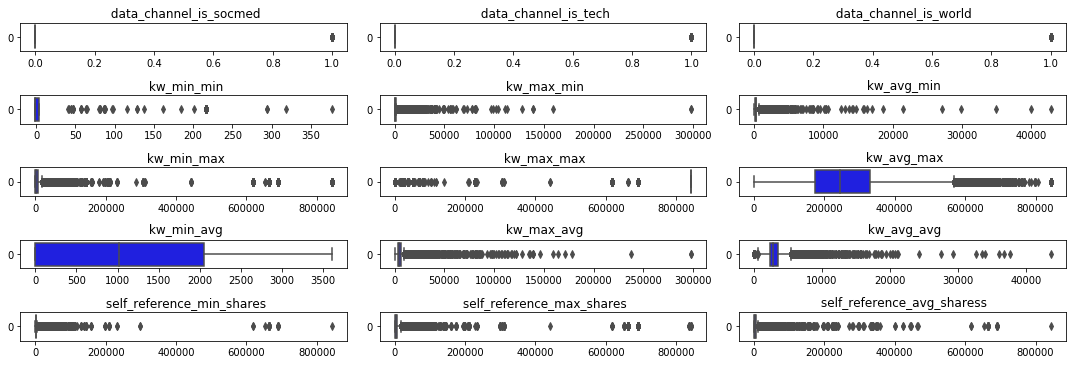

In [65]:
plt.figure(figsize=(15,15))
for i,j in enumerate(df.columns[16:31]) :
    plt.subplot(15,3,i+1)
    sns.boxplot(data=df.loc[:,j], orient='h', color='blue')
    plt.title(j);
plt.tight_layout()

plt.savefig("boxplot1.png")

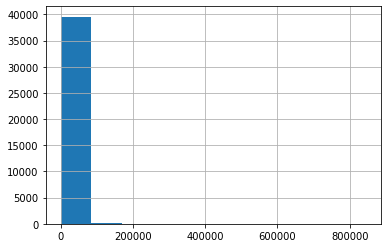

In [80]:
df.iloc[:,-1].hist()

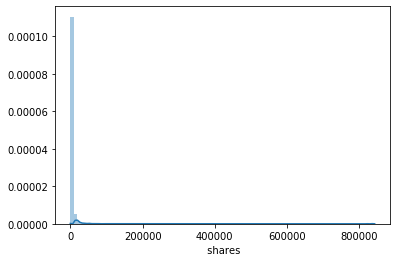

In [88]:
import numpy as np
sns.distplot(df.iloc[:,-1], 100);

In [91]:
log_shares = np.log(df.iloc[:,-1])

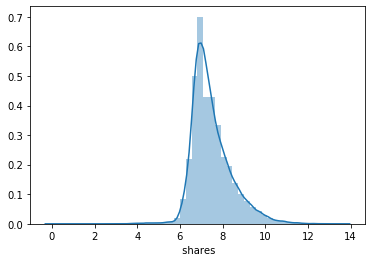

In [93]:
sns.distplot(log_shares);
plt.savefig("dis.png")

### Eléments simples de statistiques descriptives

In [ ]:
import pandas_profiling as pp
report = pp.ProfileReport(df)
report

### Ecueils potentiels

D'après nous, le principal écueil est lié au nombre des variables explicatives à disposition. L'inclusion de toutes les variables lors de la modélisation risque de mener à du sur-apprentissage. Une phase de réduction de la dimensionnalité nous semble donc nécessaire, d'autant plus que certaines variables sont très corrélées entre elles. Deux méthodes pourront être utilisées afin d'opérer cette réduction en amont :
1. Etudes des corrélations avec la variable cible (test de Student, V de Cramer, test de Kruskal-Wallis *etc*.
2. A l'aide de méthodes telles que l'ACP ou l'algortihme t-SNE. Afin de ne pas nuire à l'interprétaiblité des variables utilisées et donc du modèle final, la phase préalable de réduction de la dimensionnalité pourrait être menée sur un ensemble de variables liées (par exemple les variables relatives à la subjectivité d'un article). 

Une alternative consisterait à utiliser des méthodes robustes à la multicolinéarité et à un nombre important de prédicteurs (LASSO ou RandomForests par exemple). Toutefois, cette dernière option nous forcerait à nous limiter à un nombre restreint de modèles prédictifs. 

## Problématique

En plus de notre objectif de prédiction, la richesse de notre base de données nous permet également de déterminer quels types d'articles sont les plus populaires : les articles négatifs ou positifs ? Les articles subjectifs ou objectifs ? Est-ce qu'un thème particulier est plus populaire qu'un autre *etc*. ?